In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt

c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
# Setup generators to feed images into the ANN
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    "../Data/Alzheimerr/train_set/",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_gen = datagen.flow_from_directory(
    "../Data/Alzheimerr/test_set/",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 7200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [3]:
model = Sequential([
    # 1. Flatten: Turns the 128x128 image into one long line of numbers
    Flatten(input_shape=(128, 128, 3)),
    
    # 2. Hidden Layer: 512 neurons looking for patterns
    Dense(512, activation='relu'),
    
    # 3. Dropout: Randomly turns off some neurons to prevent "cheating" (overfitting)
    Dropout(0.2),
    
    # 4. Hidden Layer: 256 neurons
    Dense(256, activation='relu'),
    
    # 5. Output Layer: 4 neurons (one for each Alzheimer's stage)
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,166,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,298,692 (96.51 MB)

 Trainable params: 25,298,692 (96.51 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
print("Starting training...")
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=10 # We start with 10 rounds of practice
)

Starting training...
Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 80s 346ms/step - accuracy: 0.3204 - loss: 2.3634 - val_accuracy: 0.3675 - val_loss: 1.2762
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 54s 240ms/step - accuracy: 0.2775 - loss: 1.3646 - val_accuracy: 0.2500 - val_loss: 1.3864
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 49s 217ms/step - accuracy: 0.2449 - loss: 1.3865 - val_accuracy: 0.2525 - val_loss: 1.3848
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 50s 221ms/step - accuracy: 0.2524 - loss: 1.3836 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 101s 451ms/step - accuracy: 0.2461 - loss: 1.3865 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 94s 416ms/step - accuracy: 0.2478 - loss: 1.3865 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 53s 236ms/step - accuracy: 0.2444 - loss: 1.3865 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 95s 423ms/step - accu

ANN Model and Plot saved to Outputs folder!


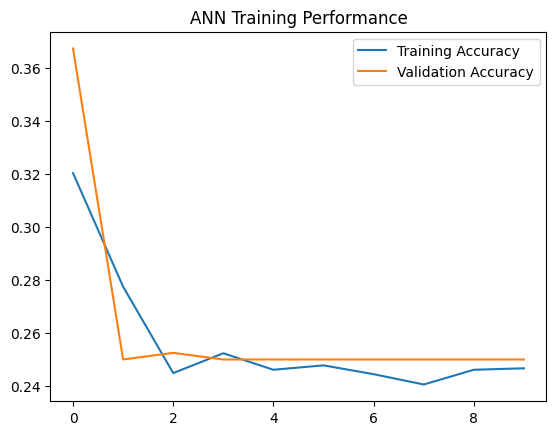

In [7]:
# Save the ANN model file
model.save('../Outputs/alzheimer_ann_model.h5')

# Save the learning progress plot
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Training Performance')
plt.legend()
plt.savefig('../Outputs/ann_plot.png')

print("ANN Model and Plot saved to Outputs folder!")